# PmagPy structure

The PmagPy 

https://github.com/PmagPy/PmagPy/blob/master/CONTRIBUTING.md



# The command line programs

As an example, let's consider that we want to draw 10 random samples from a specified Fisher distribution. This can be done with the command line program **fishrot.py**. The command line programs takes flags. For example, if we want to sample 10 directions from a Fisher distribution with a mean declination of 45, a mean inclination of 30 and a kappa of 20, we would use this command in terminal:

```
fishrot.py -k 20 -n 10 -D 45 -I 30
```

Let's look at the code of fishrot.py on Github: https://github.com/PmagPy/PmagPy/blob/master/programs/fishrot.py

We can see within the program that the program uses two function within pmag.py (```pmag.fshdev``` and ```pmag.dodirot```). Let's look at their source which is taken from pmag.py into the code cell below:

In [ ]:
def fshdev(k):
    """
    a call to fshdev(k), where k is kappa, returns a direction from distribution with mean declination of 0, inclination of 90 and kappa of k
    """
    R1=random.random()
    R2=random.random()
    L=numpy.exp(-2*k)
    a=R1*(1-L)+L
    fac=numpy.sqrt((-numpy.log(a))/(2*k))
    inc=90.-2*numpy.arcsin(fac)*180./numpy.pi
    dec=2*numpy.pi*R2*180./numpy.pi
    return dec,inc

def dodirot(D,I,Dbar,Ibar):
    """
    This function is called by dodirot(D,I,Dbar,Ibar) where D=declination, I = inclination and Dbar/Ibar are the desired mean direction.  It returns the rotated Dec/Inc pair.
    """
    d,irot=dogeo(D,I,Dbar,90.-Ibar)
    drot=d-180.
#    drot,irot=dogeo(D,I,Dbar,Ibar)
    if drot<360.:drot=drot+360.
    if drot>360.:drot=drot-360.
    return drot,irot

# Using functions in the notebook

In [8]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt

In [9]:
ipmag.fishrot?

In [10]:
ipmag.fishrot(k=20, n=10, dec=45, inc=30)

[[17.884299251510072, 36.799430837153984, 1.0],
 [58.916557218535104, 41.942779201162097, 1.0],
 [50.15695695379361, 31.266934379799643, 1.0],
 [27.649751517551579, 24.06927919516896, 1.0],
 [47.743551424320685, 33.330184057400793, 1.0],
 [73.581562433863326, 50.127783789372863, 1.0],
 [54.34732933992052, 28.685710344921624, 1.0],
 [60.194424287930644, 18.826568539135991, 1.0],
 [18.976763276743043, 27.925678514295143, 1.0],
 [31.802728213564535, 25.397918944183424, 1.0]]

In [11]:
directions = ipmag.fishrot(k=20, n=10, dec=45, inc=30)

In [16]:
ipmag.plot_di?

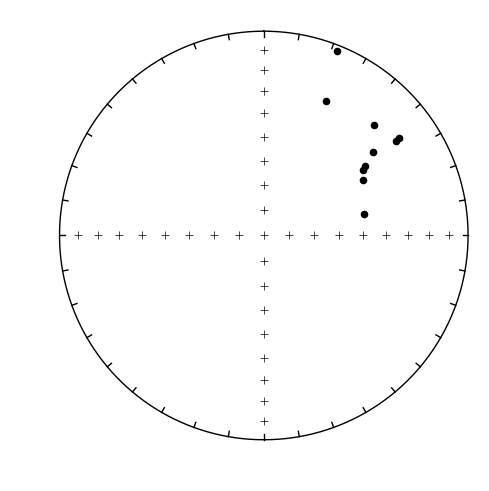

In [15]:
fignum = 1
plt.figure(num=fignum,figsize=(5,5),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(di_block=directions)
plt.show()